In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr
%matplotlib inline
wc = pd.read_csv('Wholesale Customer.csv')

In [6]:
# Use methods of descriptive statistics to summarize data
#wc.head(5)
wc.info()
#wc.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
Buyer/Spender       440 non-null int64
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(7), object(2)
memory usage: 31.0+ KB


In [7]:

#wc.iqr(axis=0)[1:7]
#iqr(wc['Fresh'])
#Which Region and which Channel seems to spend more? 
#Which Region and which Channel seems to spend less?
#wc.columns
#wc1 = wc.groupby(['Buyer/Spender']).agg({'Fresh': "sum",'Milk':"sum",'Grocery':"sum",'Frozen':"sum",'Detergents_Paper':"sum",'Delicatessen':"sum"})
#wc1.sum(axis=0)
#wc2 =wc1.groupby(['Channel','Region']).agg({'Fresh': "sum",'Milk':"sum",'Grocery':"sum",'Frozen':"sum",'Detergents_Paper':"sum",'Delicatessen':"sum"})
#wc2
#wc1.groupby(['Channel','Region'])
#wc1.get_groups()
#wcs = wc.set_index(['Channel','Region'])['Fresh'].sum(level=[0,1])
#print(wcs.max())
#wc1.get_groups('Channel','Region') #as_index = False
#wcc=wc.groupby(['Channel','Region'],as_index = False)['Fresh','Milk','Grocery', 'Frozen','Detergents_Paper', 'Delicatessen'].sum(axis=0).pivot('Channel','Region')
#print(wcc)
#wcc1=wcc.reset_index()
#wcc1.max()


In [327]:
wcgr1=wcgr.groupby(['Channel','Region']).sum()#,'Buyer/Spender'])['Fresh','Milk','Grocery', 'Frozen','Detergents_Paper', 'Delicatessen'].sum(axis=0)
print("\nTotal number of values for each item based on each channel and Region is \n{0}".format(wcgr1))
wcgr2 = wcgr1.reset_index().max()
print("\n\nMaximum values spent for 6 items across each channel and Region is\n{0}".format(wcgr2))
wcgr3 = wcgr1.reset_index().min()
print("\n\nMinimum values spent for 6 items across each channel and Region is\n{0}".format(wcgr3))
print("\n\nThe Channel and the Region seems to spend more is \n{0}".format(wcgr2.iloc[[0,1]]))
print("\n\nThe Channel and the Region seems to spend less is \n{0}".format(wcgr3.iloc[[0,1]]))


Total number of values for each item based on each channel and Region is 
                Buyer/Spender    Fresh     Milk  Grocery  Frozen  \
Channel Region                                                     
Hotel   Lisbon          14026   761233   228342   237542  184512   
        Oporto           8988   326215    64519   123074  160861   
        Other           48020  2928269   735753   820101  771606   
Retail  Lisbon           4069    93600   194112   332495   46514   
        Oporto           5911   138506   174625   310200   29271   
        Other           16006  1032308  1153006  1675150  158886   

                Detergents_Paper  Delicatessen  
Channel Region                                  
Hotel   Lisbon             56081         70632  
        Oporto             13516         30965  
        Other             165990        320358  
Retail  Lisbon            148055         33695  
        Oporto            159795         23541  
        Other             724420     

In [24]:
#1.2. There are 6 different varieties of items are considered. 
#Do all varieties show similar behaviour across Region and Channel?

# need to subset the dataset with respect to region and channel and analyze the insights based on descriptive statistics.
#The most appropriate one will be to analyse the total count and amount of spending along with the check of 
#standard deviation of the items across all channels and regions. 
#'Describe' function for each level should give the required results.

#print(wc.groupby(['Channel','Region']).describe(include='all'))
#wcct =wc.groupby(['Channel','Region'])['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'].count()
#wc[wc['Channel','Region']['Fresh']].value_counts()
#print(wcct.describe(include='all'))

wc1 =wc.groupby(['Channel','Region']).sum()
print(wc1.describe(include='all'))
#wc1.reset_index().plot(kind="bar",figsize=(18,5))
wc2=wc.groupby(['Channel','Region']).std()
print(wc2.describe(include='all'))
#wc2.reset_index().plot(kind="bar",figsize=(18,5))


       Buyer/Spender         Fresh          Milk       Grocery         Frozen  \
count       6.000000  6.000000e+00  6.000000e+00  6.000000e+00       6.000000   
mean    16170.000000  8.800218e+05  4.250595e+05  5.830937e+05  225275.000000   
std     16262.278672  1.068422e+06  4.268906e+05  5.860127e+05  275343.025909   
min      4069.000000  9.360000e+04  6.451900e+04  1.230740e+05   29271.000000   
25%      6680.250000  1.854332e+05  1.794968e+05  2.557065e+05   74607.000000   
50%     11507.000000  5.437240e+05  2.112270e+05  3.213475e+05  159873.500000   
75%     15511.000000  9.645392e+05  6.089002e+05  6.981995e+05  178599.250000   
max     48020.000000  2.928269e+06  1.153006e+06  1.675150e+06  771606.000000   

       Detergents_Paper   Delicatessen  
count          6.000000       6.000000  
mean      211309.500000  111823.833333  
std       258924.418943  120006.584665  
min        13516.000000   23541.000000  
25%        79074.500000   31647.500000  
50%       153925.000000 

In [21]:
#1.3. On the basis of the descriptive measure of variability,
#which item shows the most inconsistent behaviour? Which items shows the least inconsistent behaviour?

#wc.describe()
#print(wc['Fresh'].min())
#printing range
#wcrang=np.ptp(wc['Fresh'],axis=0)
#print(wcrang)

#printing std
wcstd=wc.std(axis=0)[0:7]
#print(wcstd)
#wcsum = wc.sum(axis=0)[3:9]
#print(wcsum)
print(wcstd.sort_values(ascending=False))
 
#Q1=np.percentile(wc.Delicatessen,25)
#Q3=np.percentile(wc.Delicatessen,75)
#IQR = Q3-Q1
#Lower= Q1- (1.5 * IQR)
#Upper = Q3 + (1.5 * IQR)
#print(wc[wc['Delicatessen'] > Upper].count())
#print(wc[wc['Delicatessen'] < Lower].count())
a=iqr(wc['Fresh'], axis=0 , rng=(25, 75), interpolation='lower')
b=iqr(wc['Grocery'], axis=0 , rng=(25, 75), interpolation='lower')
c=iqr(wc['Milk'], axis=0 , rng=(25, 75), interpolation='lower')
d=iqr(wc['Frozen'], axis=0 , rng=(25, 75), interpolation='lower')
e=iqr(wc['Detergents_Paper'], axis=0 , rng=(25, 75), interpolation='lower')
f=iqr(wc['Delicatessen'].T, axis=0 , rng=(25, 75), interpolation='lower')
print("IQR values of ","Fresh","Grocery", "Milk","Frozen","Detergents_Paper", "Delicatessen" ,"are")
print(a,b,c,d,e,f,g)

#print(iqr(wc.loc[1:7]))
#print(iqr(wc['Fresh']))
#print(iqr(wc['Grocery']))
#print(iqr(wc['Milk']))
#print(iqr(wc['Frozen']))
#print(iqr(wc['Detergents_Paper']))
#print(iqr(wc['Delicatessen']))

Fresh               12647.328865
Grocery              9503.162829
Milk                 7380.377175
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
Buyer/Spender         127.161315
dtype: float64
IQR values of  Fresh Grocery Milk Frozen Detergents_Paper Delicatessen are
13830 8499 5654 2812 3653 1413 1413


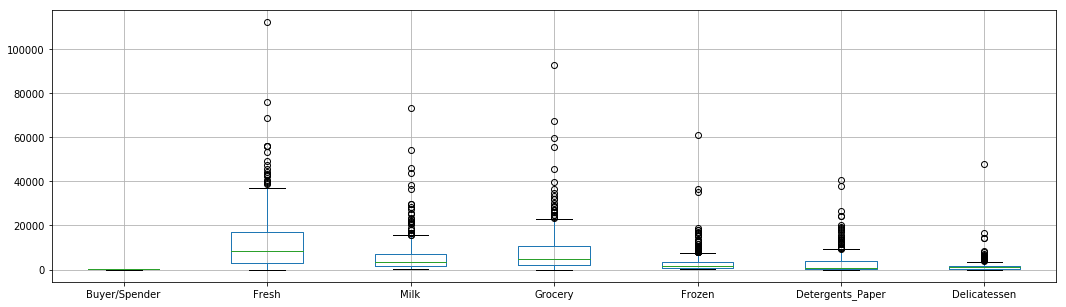

In [542]:
#1.4 Are there any outliers in the data?
plt.figure(figsize=(18,5))
wc.boxplot(column=['Buyer/Spender','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'])


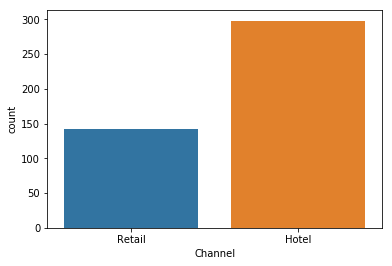

In [562]:
sns.countplot(x='Channel',data=wc)
#sns.countplot( x='Channel', data=wc, order = wc['Channel'].value_counts().index)


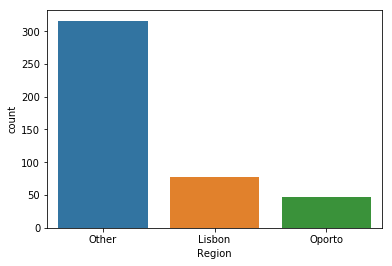

In [550]:
sns.countplot(x='Region',data=wc)
#sns.countplot(wc.Channel, hue=wc['Region'])

In [41]:
#1.5 On the basis of this report, what are the recommendations?

In [ ]:
#wcstd.sort_values(ascending=False).plot(kind="bar")
#wcsum.sort_values(ascending=False).plot(kind="bar")
#wc.isnull().any()
#iqr(wc['Fresh'])
#mean1=np.mean(wc['Delicatessen'])
#print(mean1)
#sd=np.std(wc['Delicatessen'])#['Fresh']
#print(sd)
#wc[wc['Delicatessen'] > mean1 + 3 * sd].count()
#wc[wc['Delicatessen'] < mean1 - 3 * sd].count()